In [311]:
import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [312]:
maindf=pd.read_csv('/content/BTC-USD.csv')

In [313]:
print('Total number of days present in the dataset: ',maindf.shape[0])
print('Total number of fields present in the dataset: ',maindf.shape[1])

Total number of days present in the dataset:  3352
Total number of fields present in the dataset:  7


In [314]:
maindf.shape

(3352, 7)

In [315]:
maindf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [316]:
maindf.tail()




,Date,Open,High,Low,Close,Adj Close,Volume
3347,2023-11-16,37879.980469,37934.625000,35545.472656,36154.769531,36154.769531,26007385366
3348,2023-11-17,36164.824219,36704.484375,35901.234375,36596.683594,36596.683594,22445028430
3349,2023-11-18,36625.371094,36839.281250,36233.312500,36585.703125,36585.703125,11886022717
3350,2023-11-19,36585.765625,37509.355469,36414.597656,37386.546875,37386.546875,12915986553
3351,2023-11-20,37374.074219,37394.710938,37081.378906,37214.957031,37214.957031,15918764032


In [317]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3352 entries, 0 to 3351
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3352 non-null   object 
 1   Open       3352 non-null   float64
 2   High       3352 non-null   float64
 3   Low        3352 non-null   float64
 4   Close      3352 non-null   float64
 5   Adj Close  3352 non-null   float64
 6   Volume     3352 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 183.4+ KB


In [318]:
maindf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3352.000000,3352.000000,3352.000000,3352.000000,3352.000000,3.352000e+03
mean,14246.646767,14582.588818,13883.224861,14256.256182,14256.256182,1.647821e+10
std,16011.678239,16401.200905,15572.166782,16011.743768,16011.743768,1.917560e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,896.566025,910.066986,864.113754,898.162261,898.162261,1.470975e+08
50%,8160.602784,8288.145019,7928.415039,8164.351075,8164.351075,1.094857e+10
75%,23087.212402,23468.427246,22696.540039,23122.884766,23122.884766,2.695812e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [319]:
print('Null Values:',maindf.isnull().values.sum())
print('NA values:',maindf.isnull().values.any())

Null Values: 0
NA values: False


In [320]:

sd=maindf.iloc[0][0]
ed=maindf.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 2014-09-17
Ending Date 2023-11-20


In [321]:
maindf.shape

(3352, 7)

In [322]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

In [323]:
closedf = maindf[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (3352, 2)


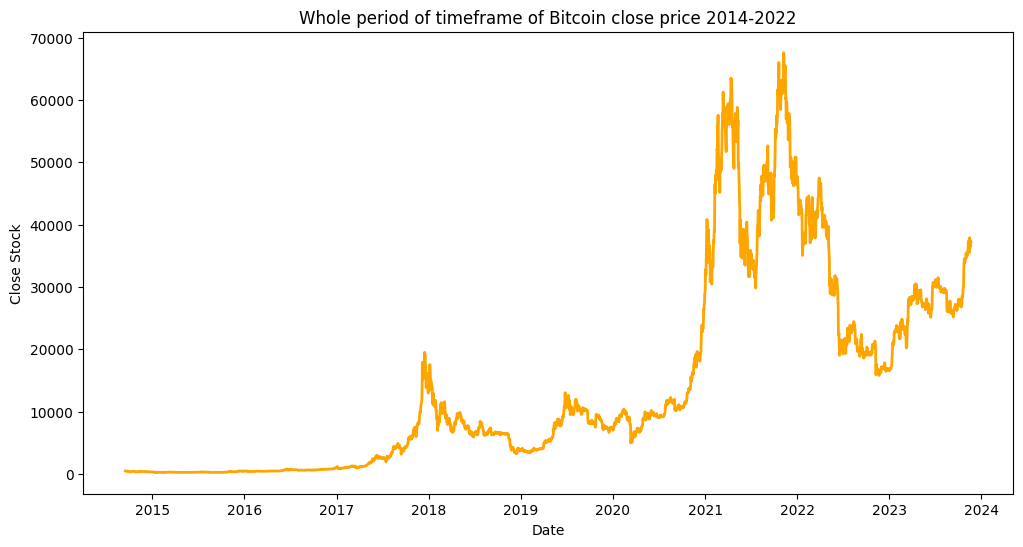

In [324]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(closedf['Date'], closedf['Close'], color='orange', linewidth=2)
plt.title('Whole period of timeframe of Bitcoin close price 2014-2022')
plt.xlabel('Date')
plt.ylabel('Close Stock')
plt.grid(visible=False)
plt.show()

In [325]:
closedf = closedf[closedf['Date'] > '2022-11-20']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  365


In [326]:
closedf

,Date,Close
2987,2022-11-21,15787.284180
2988,2022-11-22,16189.769531
2989,2022-11-23,16610.707031
2990,2022-11-24,16604.464844
2991,2022-11-25,16521.841797
...,...,...
3347,2023-11-16,36154.769531
3348,2023-11-17,36596.683594
3349,2023-11-18,36585.703125
3350,2023-11-19,37386.546875


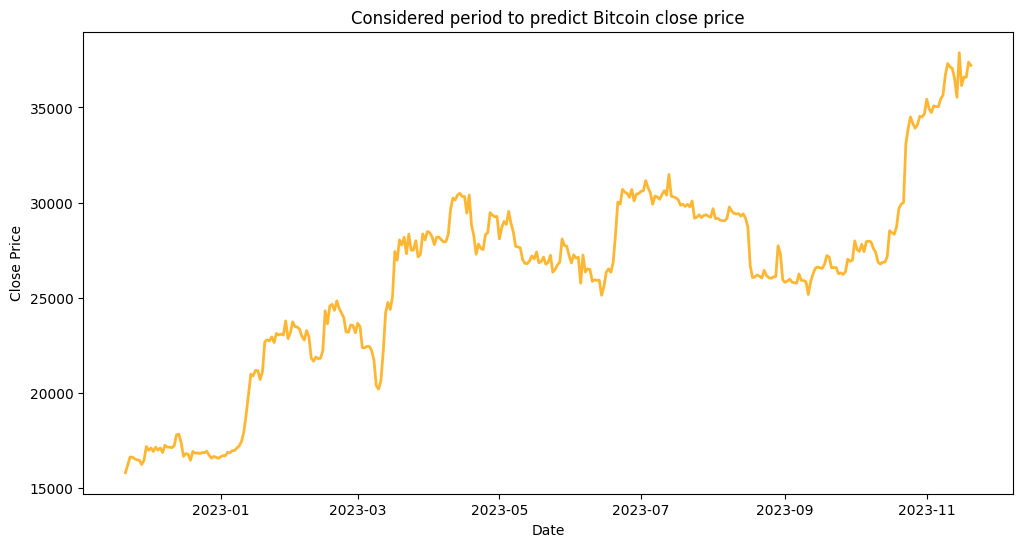

In [327]:
plt.figure(figsize=(12, 6))
plt.plot(closedf['Date'], closedf['Close'], color='orange', linewidth=2, alpha=0.8)
plt.title('Considered period to predict Bitcoin close price')
plt.xlabel('Date')
plt.ylabel('Close Price')

plt.show()

In [328]:
# deleting date column and normalizing using MinMax Scaler

del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(365, 1)


In [331]:

training_size=int(len(closedf)*0.60) #60-40 train - test split
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (219, 1)
test_data:  (146, 1)


In [332]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----x
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [333]:
time_step = 15 # 15 day lookback /lag
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (203, 15)
y_train:  (203,)
X_test:  (130, 15)
y_test (130,)


In [334]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (203, 15, 1)
X_test:  (130, 15, 1)


Epoch 1/100
13/13 [==============================] - 4s 63ms/step - loss: 0.0101 - val_loss: 0.0175
Epoch 2/100
13/13 [==============================] - 0s 12ms/step - loss: 0.0084 - val_loss: 0.0053
Epoch 3/100
13/13 [==============================] - 0s 10ms/step - loss: 0.0062 - val_loss: 0.0043
Epoch 4/100
13/13 [==============================] - 0s 10ms/step - loss: 0.0044 - val_loss: 0.0057
Epoch 5/100
13/13 [==============================] - 0s 14ms/step - loss: 0.0042 - val_loss: 0.0066
Epoch 6/100
13/13 [==============================] - 0s 12ms/step - loss: 0.0040 - val_loss: 0.0060
Epoch 7/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0038 - val_loss: 0.0053
Epoch 8/100
13/13 [==============================] - 0s 10ms/step - loss: 0.0037 - val_loss: 0.0049
Epoch 9/100
13/13 [==============================] - 0s 10ms/step - loss: 0.0036 - val_loss: 0.0045
Epoch 10/100
13/13 [==============================] - 0s 10ms/step - loss: 0.0036 - val_loss: 0.0043

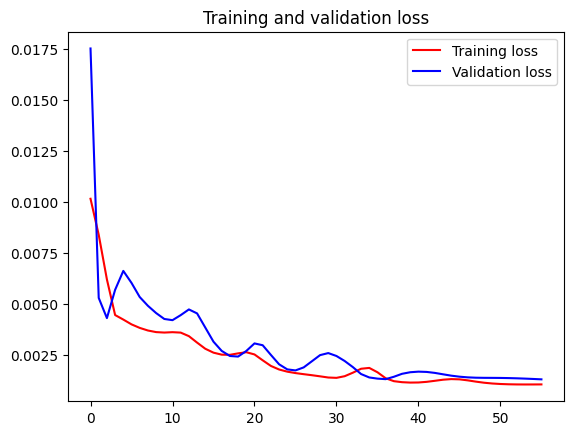

<Figure size 640x480 with 0 Axes>

In [336]:
from keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(128))
model.add(Dense(1))

# compile and fit the model using early stopping
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, y_train, epochs=100, batch_size=16, shuffle=False,  #Shuffle= false for timeseries data
                    validation_data=(X_test, y_test),
                    callbacks = [EarlyStopping(monitor='val_loss', min_delta=5e-5, patience=20, verbose=0)])
# Plot the loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [337]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

5/5 [==============================] - 0s 3ms/step


((203, 1), (130, 1))

In [338]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

In [339]:
# Evaluation metric RMSE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))

Train data RMSE:  667.4286101181301
Train data MSE:  445460.9496042189
Train data MAE:  490.5963092376847
-------------------------------------------------------------------------------------
Test data RMSE:  795.6193756183517
Test data MSE:  633010.1908593357
Test data MAE:  534.8041316153846


In [340]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.9759330333168369
Test data R2 score: 0.948358642466096


Epoch 40: early stopping
5/5 [==============================] - 1s 4ms/step
Epoch 35: early stopping
5/5 [==============================] - 1s 4ms/step
Epoch 68: early stopping
5/5 [==============================] - 1s 4ms/step
Epoch 55: early stopping
5/5 [==============================] - 1s 4ms/step
Epoch 74: early stopping
5/5 [==============================] - 1s 5ms/step
Epoch 85: early stopping
5/5 [==============================] - 1s 4ms/step


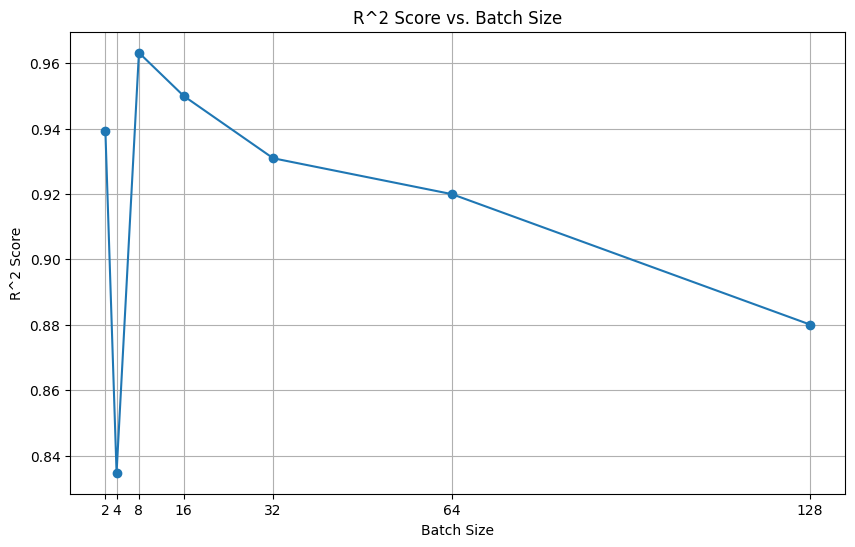

In [341]:
#Batch size hyper parameter testing

batch_sizes = [2, 4, 8, 16, 32, 64, 128]
r2_scores = []

for batch_size in batch_sizes:
    model = Sequential()
    model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(LSTM(128))
    model.add(Dense(1))
    # Compile the model
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Fit the model
    history = model.fit(X_train, y_train, epochs=100, batch_size=batch_size, shuffle=False,
                        validation_data=(X_test, y_test),
                        callbacks=[EarlyStopping(monitor='val_loss', min_delta=5e-5, patience=20, verbose=1)],
                        verbose=0)
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Calculate R^2 score and append to list
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)
# Plot R^2 scores against batch_sizes
plt.figure(figsize=(10, 6))
plt.plot(batch_sizes, r2_scores, marker='o')
plt.title('R^2 Score vs. Batch Size')
plt.xlabel('Batch Size')
plt.ylabel('R^2 Score')
plt.xticks(batch_sizes)
plt.grid(True)
plt.show()


Epoch 100: early stopping
5/5 [==============================] - 1s 4ms/step
Epoch 78: early stopping
5/5 [==============================] - 1s 4ms/step
Epoch 60: early stopping
5/5 [==============================] - 1s 4ms/step
Epoch 87: early stopping
5/5 [==============================] - 1s 5ms/step
Epoch 45: early stopping
5/5 [==============================] - 1s 6ms/step


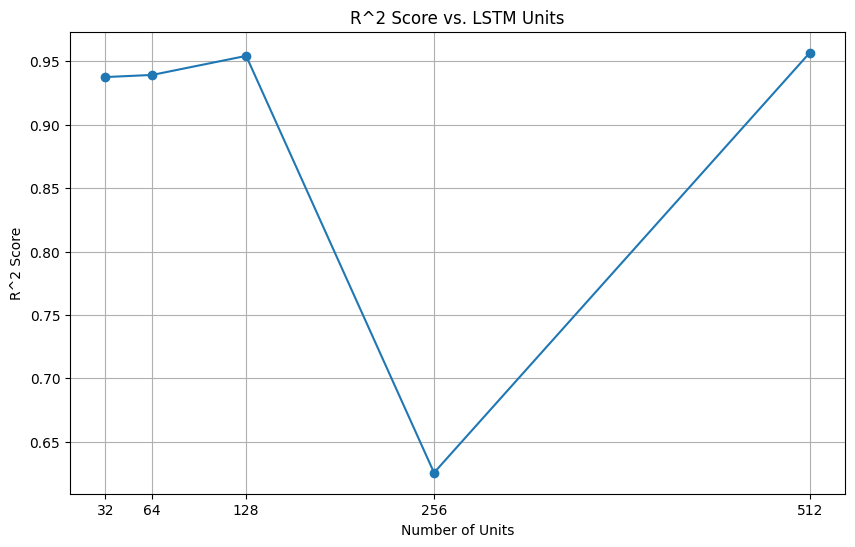

In [342]:
#LSTM units hyper parameter testing

units_list = [32, 64, 128, 256, 512]
r2_scores = []

for units in units_list:
    model = Sequential()
    model.add(LSTM(units, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(LSTM(units))
    model.add(Dense(1))
    # Compile the model
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Fit the model
    history = model.fit(X_train, y_train, epochs=100, batch_size=16, shuffle=False,
                        validation_data=(X_test, y_test),
                        callbacks=[EarlyStopping(monitor='val_loss', min_delta=5e-5, patience=20, verbose=1)],
                        verbose=0)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate R^2 score and append to list
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

# Plot R^2 scores against units
plt.figure(figsize=(10, 6))
plt.plot(units_list, r2_scores, marker='o')
plt.title('R^2 Score vs. LSTM Units')
plt.xlabel('Number of Units')
plt.ylabel('R^2 Score')
plt.xticks(units_list)
plt.grid(True)
plt.show()


Train predicted data:  (365, 1)
Test predicted data:  (365, 1)


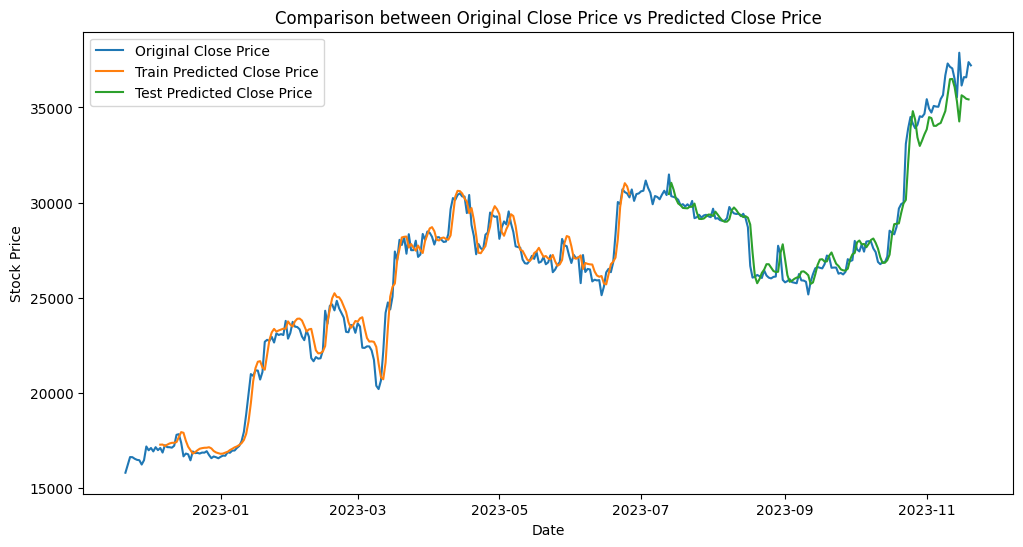

In [343]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({
    'date': close_stock['Date'],
    'original_close': close_stock['Close'],
    'train_predicted_close': trainPredictPlot.reshape(-1),
    'test_predicted_close': testPredictPlot.reshape(-1)
})
plt.figure(figsize=(12, 6))
plt.plot(plotdf['date'], plotdf['original_close'], label='Original Close Price')
plt.plot(plotdf['date'], plotdf['train_predicted_close'], label='Train Predicted Close Price')
plt.plot(plotdf['date'], plotdf['test_predicted_close'], label='Test Predicted Close Price')
plt.title('Comparison between Original Close Price vs Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [344]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 30 # days in the future to predict
while(i<pred_days):

    if(len(temp_input)>time_step):

        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))

        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)

        lst_output.extend(yhat.tolist())
        i=i+1

    else:

        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())

        lst_output.extend(yhat.tolist())
        i=i+1

print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  30


In [345]:
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39
 40 41 42 43 44 45]


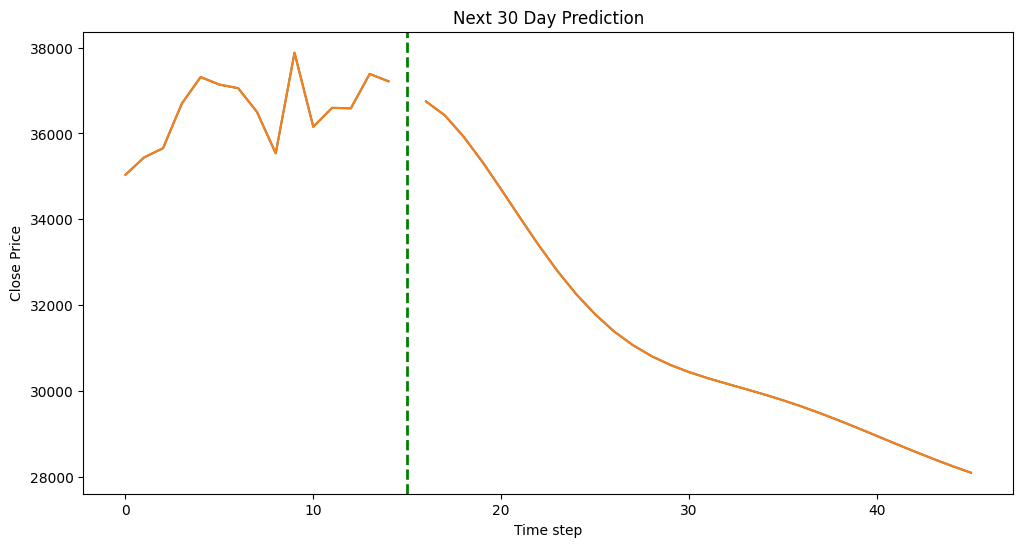

In [346]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

# Plotting using Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(new_pred_plot.index, new_pred_plot['last_original_days_value'], label='Last 15 days close price')
plt.plot(new_pred_plot.index, new_pred_plot['next_predicted_days_value'], label='Predicted next 30 days close price')
plt.axvline(x=time_step, color='green', linestyle='--', linewidth=2)
plt.title('Next 30 Day Prediction')
plt.xlabel('Time step')
plt.ylabel('Close Price')
plt.show()

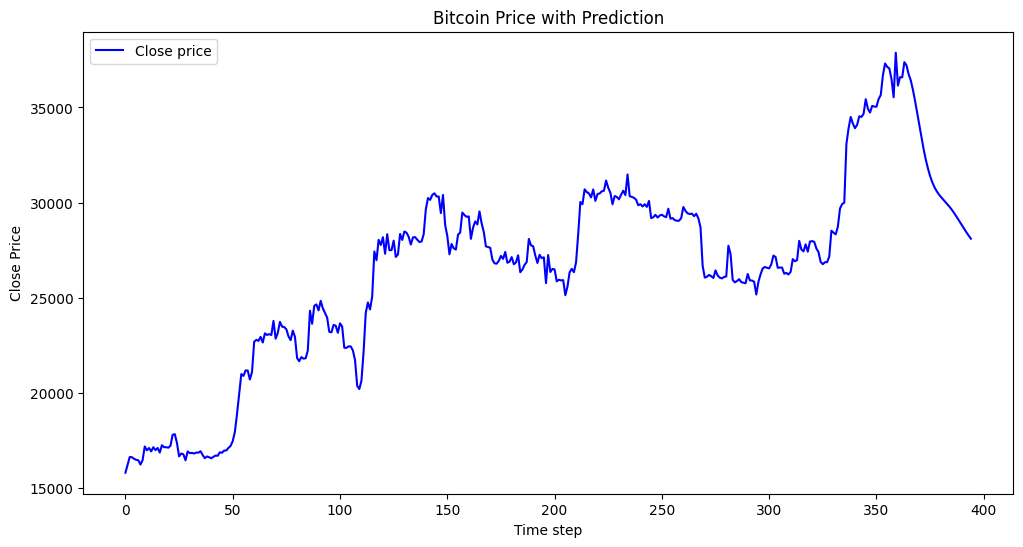

In [348]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]


plt.figure(figsize=(12, 6))
plt.plot(lstmdf, label='Close price', color='blue')
plt.title('Bitcoin Price with Prediction')
plt.xlabel('Time step')
plt.ylabel('Close Price')
plt.legend()
plt.show()